<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-preco-de-acoes-da-Magazine-Luiza-S.A.-MGLU3.SA-com-o-PROPHET/blob/main/Prevendo_pre%C3%A7o_de_a%C3%A7%C3%B5es_da_Magazine_Luiza_S_A_(MGLU3_SA)_com_o_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prevendo preço de ações da Magazine Luiza S.A. (MGLU3.SA) com o `PROPHET`**
---

<center><img src='https://upload.wikimedia.org/wikipedia/commons/1/1b/Magalu_-_novo_logo.png' width='500'>

- Website oficial	www.magazineluiza.com.br

O `Magazine Luiza` ([B3](https://pt.wikipedia.org/wiki/B3_(bolsa_de_valores): [MGLU3](http://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/renda-variavel/empresas-listadas.htm?codigo=22470)) ou **Magalu**, é uma plataforma digital de varejo brasileira multicanal. Fundada em 1957 na cidade de [Franca](https://pt.wikipedia.org/wiki/Franca) pelo casal Luiza Trajano Donato e seu esposo Pelegrino José Donato.

Possui mais de 1110 lojas físicas, está presente em 23 estados e 819 municípios do país e seu modelo de negócio hoje caracteriza-se como uma plataforma digital com pontos físicos.

Sua operação de e-commerce ganhou 12 vezes o troféu Diamante no Prêmio Excelência em Qualidade Comércio Eletrônico – B2C.

✅ **SAIBA MAIS!**
- [Magazine Luiza](https://pt.wikipedia.org/wiki/Magazine_Luiza)




In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 776 kB/s 
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install fbprophet

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=3)
np.random.seed(42)

%matplotlib inline
plt.rcParams['figure.figsize'] = (18,7)
sns.set()

In [6]:
data = yf.download('MGLU3.SA', start='2018-01-01', end=dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2.528,2.574,2.450,2.478,2.391,59427200
2018-01-03,2.469,2.543,2.422,2.447,2.361,41385600
2018-01-04,2.500,2.516,2.478,2.506,2.417,47936000
2018-01-05,2.514,2.528,2.448,2.456,2.370,30684800
2018-01-08,2.453,2.503,2.448,2.457,2.370,28796800


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-11,3.880,4.090,3.870,3.930,3.930,140586300
2022-05-12,3.830,4.210,3.740,4.180,4.180,193108900
2022-05-13,4.230,4.480,4.220,4.380,4.380,140177600
2022-05-16,4.380,4.380,4.380,4.380,4.380,0
2022-05-17,4.460,4.500,3.930,3.940,3.940,267660100


In [ ]:
data.shape

(1080, 6)

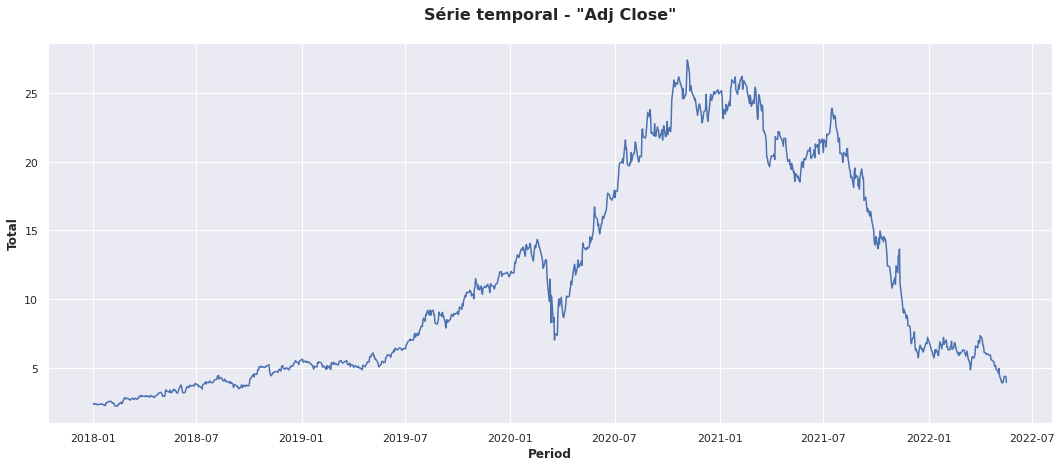

In [18]:
# plotando gráfico de linhas da série temporal somente do atributo "Adj Close"
# plt.figure(figsize=(18,7))

plt.title('Série temporal - "Adj Close"\n', 
          {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Period', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Total', {'fontsize': 12, 'fontweight': 'bold'})

plt.plot(data.index, data[['Adj Close']]);

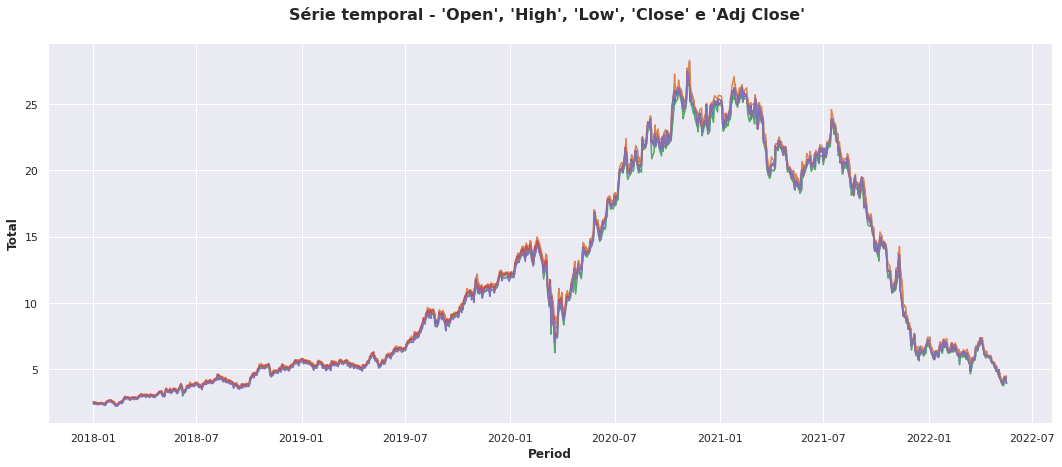

In [20]:
# plotando gráfico de linhas da série temporal de todos atributos
# plt.figure(figsize=(18,7))

plt.title("Série temporal - 'Open', 'High', 'Low', 'Close' e 'Adj Close' \n", 
          {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Period', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Total', {'fontsize': 12, 'fontweight': 'bold'})

plt.plot(data.index, data[['Open', 'High', 'Low', 'Close', 'Adj Close']]);

Vamos deixar os gráficos mais interativo e, por consequente mais interpretável. Para isso, utilizaremos a _library_ [Plotly](https://plotly.com/).

In [30]:
# importando a biblioteca "plotly" e juntamente a função ".express"
import plotly.express as px

# função para realizar o "plot" do gráfico interativo
def interactive_plot(df, title=None):
    fig = px.line(title=title)

    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)
    fig.show()

In [31]:
# plotando gráfico de linhas da série temporal somente do atributo "Adj Close"
interactive_plot(data['Adj Close'].reset_index(), 'Stock Prices - Adj Close [MGLU3.SA]')

In [23]:
# plotando gráfico de linhas da série temporal de todos atributos
interactive_plot(data[['Open', 'High', 'Low', 'Close', 'Adj Close']].reset_index(), 'Stock Prices - Adj Clos [MGLU3.SA]')

In [24]:
df = pd.DataFrame()
df

""


In [25]:
df['y'] = data['Adj Close']

In [26]:
df

,y
Date,
2018-01-02,2.391
2018-01-03,2.361
2018-01-04,2.417
2018-01-05,2.370
2018-01-08,2.370
...,...
2022-05-11,3.930
2022-05-12,4.180
2022-05-13,4.380


In [27]:
df['ds'] = data.index

In [28]:
df

,y,ds
Date,,
2018-01-02,2.391,2018-01-02
2018-01-03,2.361,2018-01-03
2018-01-04,2.417,2018-01-04
2018-01-05,2.370,2018-01-05
2018-01-08,2.370,2018-01-08
...,...,...
2022-05-11,3.930,2022-05-11
2022-05-12,4.180,2022-05-12
2022-05-13,4.380,2022-05-13


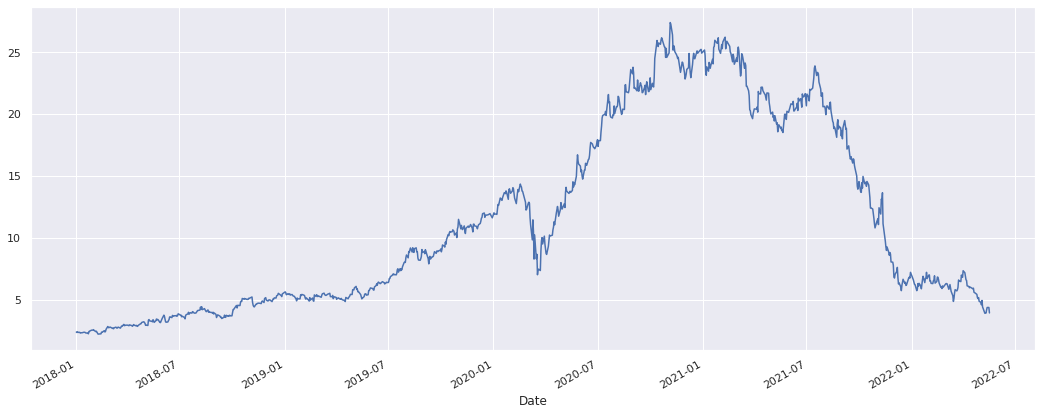

In [29]:
# gráfico de linha da série temporal
# df['y'].plot(figsize=(18,7));
df['y'].plot();

In [32]:
interactive_plot(df.reset_index())

In [33]:
from fbprophet import Prophet

In [34]:
mdl = Prophet(daily_seasonality=True)

In [35]:
mdl.fit(df)

In [36]:
forecast = mdl.make_future_dataframe(periods=90)
predictions = mdl.predict(forecast)

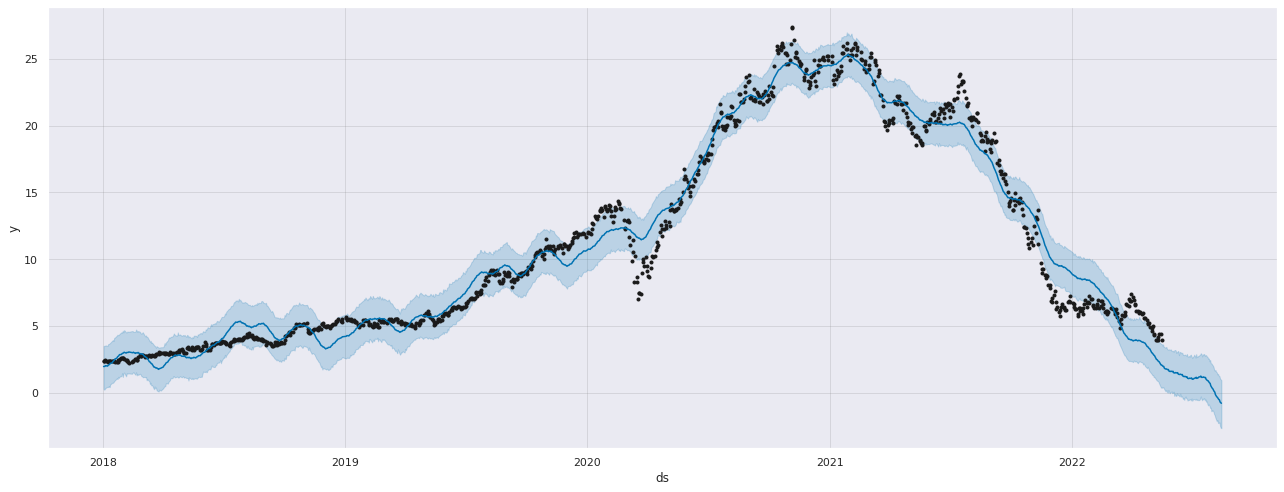

In [37]:
mdl.plot(predictions, figsize=(18,7));

In [38]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1167,2022-08-11,-2.112,-2.289,1.261,-2.783,-1.421,1.595,1.595,1.595,0.315,...,0.015,0.015,0.015,1.265,1.265,1.265,0.000,0.000,0.000,-0.518
1168,2022-08-12,-2.165,-2.230,1.235,-2.846,-1.461,1.619,1.619,1.619,0.315,...,0.056,0.056,0.056,1.247,1.247,1.247,0.000,0.000,0.000,-0.546
1169,2022-08-13,-2.217,-2.516,1.040,-2.909,-1.501,1.511,1.511,1.511,0.315,...,-0.039,-0.039,-0.039,1.236,1.236,1.236,0.000,0.000,0.000,-0.706
1170,2022-08-14,-2.269,-2.647,0.981,-2.969,-1.541,1.504,1.504,1.504,0.315,...,-0.039,-0.039,-0.039,1.229,1.229,1.229,0.000,0.000,0.000,-0.765
1171,2022-08-15,-2.321,-2.677,0.917,-3.031,-1.580,1.515,1.515,1.515,0.315,...,-0.027,-0.027,-0.027,1.227,1.227,1.227,0.000,0.000,0.000,-0.806


In [39]:
predictions.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [40]:
df.shape[0], predictions.shape[0]

(1082, 1172)

In [41]:
predictions.shape[0] - df.shape[0]

90

In [42]:
df['y'][:15]

Date
2018-01-02   2.391
2018-01-03   2.361
2018-01-04   2.417
2018-01-05   2.370
2018-01-08   2.370
2018-01-09   2.313
2018-01-10   2.337
2018-01-11   2.341
2018-01-12   2.338
2018-01-15   2.379
2018-01-16   2.373
2018-01-17   2.375
2018-01-18   2.336
2018-01-19   2.314
2018-01-22   2.322
Name: y, dtype: float64

In [43]:
predictions['yhat'][:-30]

0      1.945
1      1.951
2      1.959
3      2.011
4      1.979
        ... 
1137   1.161
1138   1.172
1139   1.181
1140   1.229
1141   1.135
Name: yhat, Length: 1142, dtype: float64

In [44]:
len(predictions['yhat'][:-30])

1142

In [45]:
data2 = data.reset_index()

In [46]:
data2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,2.528,2.574,2.450,2.478,2.391,59427200
1,2018-01-03,2.469,2.543,2.422,2.447,2.361,41385600
2,2018-01-04,2.500,2.516,2.478,2.506,2.417,47936000
3,2018-01-05,2.514,2.528,2.448,2.456,2.370,30684800
4,2018-01-08,2.453,2.503,2.448,2.457,2.370,28796800
...,...,...,...,...,...,...,...
1077,2022-05-11,3.880,4.090,3.870,3.930,3.930,140586300
1078,2022-05-12,3.830,4.210,3.740,4.180,4.180,193108900
1079,2022-05-13,4.230,4.480,4.220,4.380,4.380,140177600
1080,2022-05-16,4.380,4.380,4.380,4.380,4.380,0


In [47]:
df_predicted = data2[1:][['Date']]
df_predicted

,Date
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
5,2018-01-09
...,...
1077,2022-05-11
1078,2022-05-12
1079,2022-05-13
1080,2022-05-16


In [48]:
df_predicted['predictions'] = predictions['yhat'][:-30]
df_predicted

,Date,predictions
1,2018-01-03,1.951
2,2018-01-04,1.959
3,2018-01-05,2.011
4,2018-01-08,1.979
5,2018-01-09,2.047
...,...,...
1077,2022-05-11,2.397
1078,2022-05-12,2.333
1079,2022-05-13,2.314
1080,2022-05-16,2.063


In [49]:
df_predicted['Close'] = data2['Adj Close']

In [50]:
df_predicted.tail(20)

,Date,predictions,Close
1062,2022-04-19,3.776,5.940
1063,2022-04-20,3.738,5.610
1064,2022-04-22,3.691,5.550
1065,2022-04-25,3.446,5.440
1066,2022-04-26,3.430,5.180
1067,2022-04-27,3.365,5.100
1068,2022-04-28,3.299,5.180
1069,2022-04-29,3.272,4.880
1070,2022-05-02,2.977,4.800
1071,2022-05-03,2.950,4.600


In [51]:
interactive_plot(df_predicted)